# Energy and Sizing Calculations

To figure out the energy required to fly around the course, we need to figure out:

1. What is the course itself? What is the distance, and how much is the plane required to turn? How quickly does the plane need to fly through the course?
2. What are the performance characteristics of the plane, ie, how much **drag** is created when the plane flies through a turn? How much thrust is available for a certain power input at a certain speed?

The answers to these questions will define a performance score that tells us how much energy a particular design requires.

For the purposes of this notebook, we can assume that the total mass of the plane is 10 kg.

We'll also assume that the mission can be separated into three distinct portions:

1. **Takeoff**: the plane goes from stationary on the ground to flying at the mission altitude and airspeed.
2. **Navigation**: the plane flies around the waypoints, releases the payload over the target, and returns to base.
3. **Landing**: The plane lands back on the ground.

Most of the energy requirements for the mission come from the navigation section. We'll make a simple model of the plane's flight to determine how much energy is required.

# Level Flight with Turns

We'll assume that the plane is flying steady and level, neither climbing nor descending. To go through a turn, the plane **banks** to the side. Here's a free-body diagram:

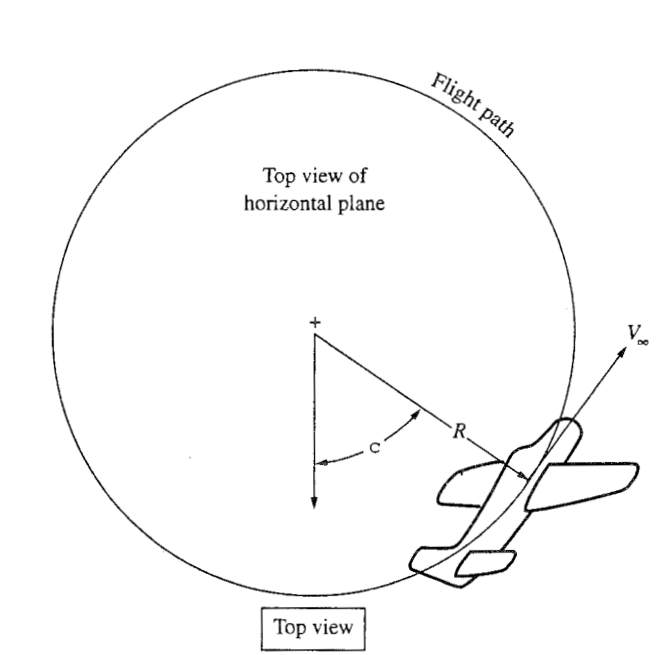

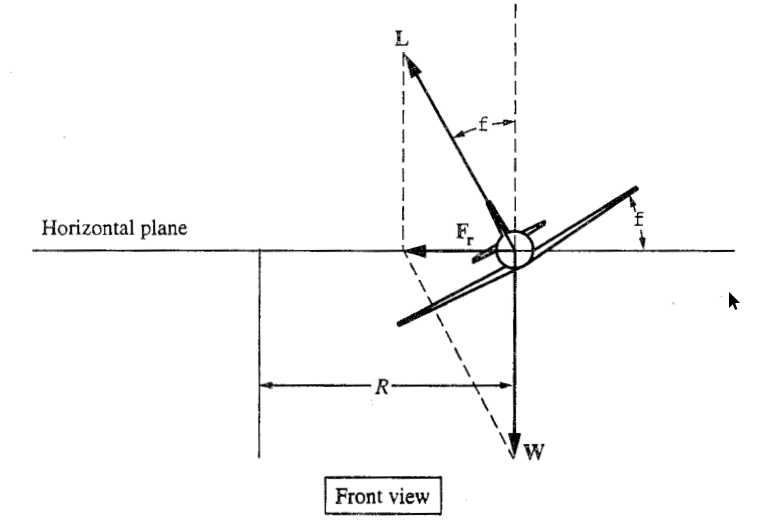

(J.D. Anderson, Aircraft Performance and Design)

The angle labelled `f` in Anderson's image is the bank angle $\phi$. Clearly, for the plane to be level, the vertical force $L \cos \phi$ needs to equal the downwards force of gravity, $W = mg$. This means that as the plane banks more into the turn, it needs to generate more lift to keep itself level. 

<aside>
Note that, unlike a boat, the plane does not turn with its rudder. A plane turns by rolling and increasing its lift to create a resultant force perpendicular to the flight path. This is why the control surfaces don't need to work very hard, in general -- the forces that maneuver the plane itself come from the wing.
</aside>

The lift is 

$$
L = {1 \over 2} \rho V^2 S_{ref} C_L
$$

with 

$$
L \cos \phi = mg
$$

This means that when the plane is turning, it needs to generate more lift. This creates more drag. The drag coefficient due to lift ($C_{D,i}$)is

$$
C_{D, i} = {C_L^2 \over \pi e AR} = K C_L^2
$$

where $C_L$ is the lift coefficient (proportional to the amount of lift being generated), $e \le 1$ is the Oswald efficiency factor (related to the wing geometry, equal to one for an elliptical wing planform, usually in the range of 0.9-0.95), and $AR = S/\bar{c}^2$ is the aspect ratio of the wing.

<aside>
This is why gliders have high aspect ratios -- it allows them to climb and turn without a huge drag penalty.
</aside>

The total drag on the plane is 

$$
D = {1 \over 2} \rho V^2 S_{ref} C_D = {1 \over 2} \rho V^2 S_{ref} \left(C_{D, 0} + C_{D, i}\right)
$$

As the plane goes through sharper turns (higher $C_{D, i}$) at higher speeds (higher $V$), the drag increases, due to the higher drag due to lift.

This gives us a starting point to determine the total amount of thrust required to go through the course a number of times at a particular speed. First, we need to determine the path taken through the course, in terms of how much the plane needs to turn and how tight the turns need to be. Then, we'll write down the equations that determine the drag experienced by the plane throughout the course. Finally, integrate the thrust required through the path of the plane to determine the energy.

# Common Approximations for Initial Sizing

For our initial sizing, we want to figure out **how large the main wing needs to be**. This wing provides all of the lift that will allow our plane to navigate.

We can use **rules of thumb**, comparing to the literature, to determine the zero-lift drag coefficient $C_{D,0}$ as well as the maximum lift coefficient $C_{L,max}$. A good number for $C_{L,max}$ is 1.2. The zero-lift drag coefficient depends on factors like the landing gear, protruberances coming off of the plane, and how aerodynamic the plane shape is. A good number for $C_{D,0}$ is 0.03. For a glider or sailplane $C_{D,0}$ could be as little as 0.01.

PLEASE NOTE:

I made these numbers the $#~* up. THEY MUST BE RECALCULATED AS THE DESIGN PROGRESSES.

Sources of drag:

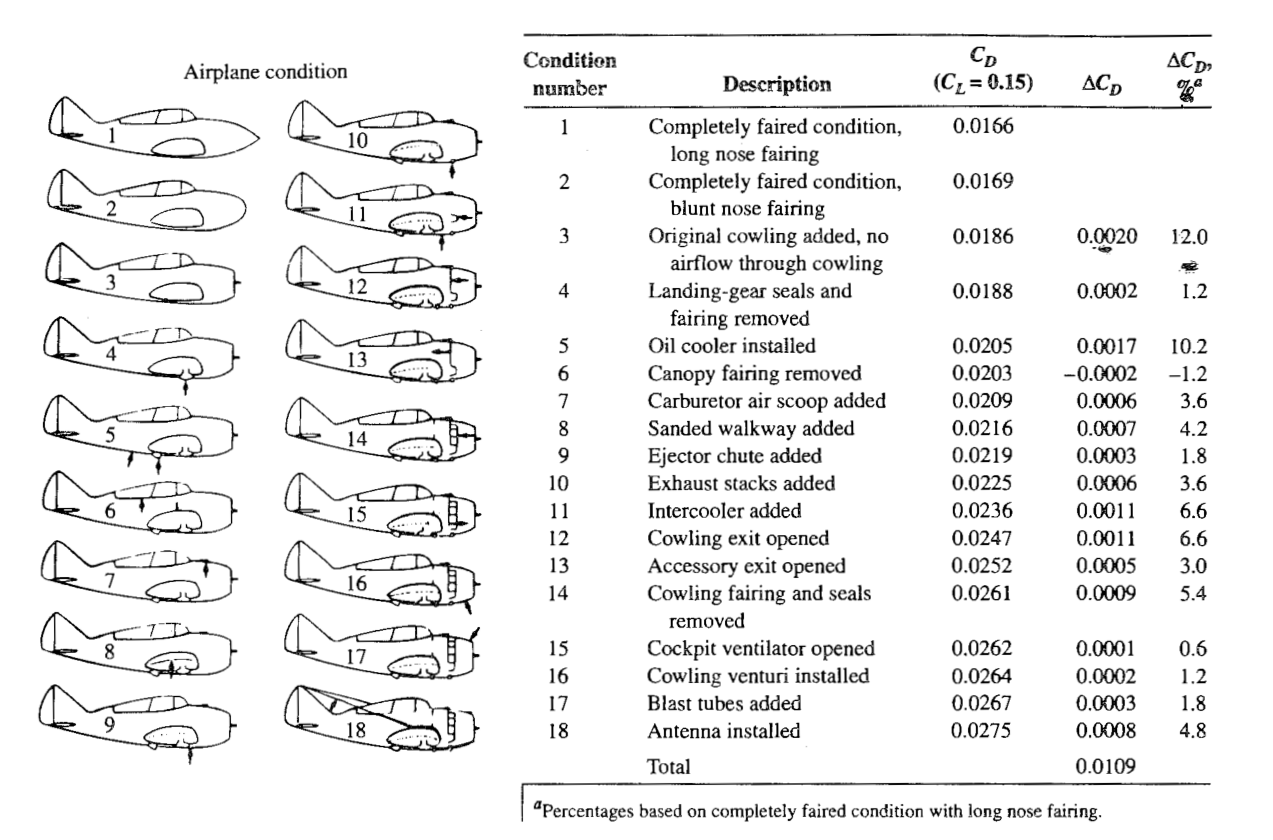

# 2D Path Requirements For Simple Airplanes

Now let's apply some mathematics to see how our airplane flies through the path described by our mission. Our idea is going to be:

1. Prescribe a path in 2 dimensions, agnostic to how the airplane will fly through it.
2. Determine the energy requirements to fly through the path at different speeds.

A **path**, for our purposes, will be a function from the real line into the 2D plane. The parameter for the path could be either *distance travelled* or *time taken*; we'll use distance travelled to avoid unnecessary restrictions on the motion of the plane. The name for this sort of path is **arclength parameterized.** We'll write such a path as 

$$
\vec{\gamma} = \vec{\gamma}(s)
$$

where $s$ parameterizes how far the plane has travelled at a given point in the path.

The key point about an arclength-parameterized curve is that the tangent vector $\vec{\gamma}'(s)$ always has unit length:

$$
\vec{\gamma}'(s) = {\mathrm d \vec{\gamma} \over \mathrm d t} {\mathrm d t \over \mathrm d s} = {\vec{\gamma}'(t) \over \| \vec{\gamma}'(t) \|} \implies {\mathrm d t \over \mathrm d s} = {1 \over \| \vec{\gamma}'(t) \|} \implies {\mathrm d s \over \mathrm d t} = \| \vec{\gamma}'(t) \|
$$

To get an arclength parameterized path from a non-arclength parameterized path $\vec{\gamma}(t) = [x(t), y(t)]^{\mathrm T}$, we'll use some calculus magic (the chain rule):

$$
s(t) = \int_0^t \mathrm d s
$$

$$
\begin{gather}
\mathrm d s = {\mathrm d s \over \mathrm d t}\mathrm d t =
\left\|{\mathrm d \vec{\gamma} \over \mathrm d t}\right\| \mathrm d t = \sqrt{x'(t)^2 + y'(t)^2} \ \mathrm d t \\ 
\implies s(t) = \int_0^t \sqrt{x'(\tau)^2 + y'(\tau)^2} \ \mathrm d \tau
\end{gather}
$$


This allows us to turn any planar curve into an arclength parameterized curve. To find the local *[radius of curvature](https://en.wikipedia.org/wiki/Curvature)* at any point (the radius of the circle which best fits into the curve), we simply look at the acceleration $\vec{\gamma}''(s)$:

$$
\|\vec{\gamma}''(s)\| = {1 \over R}
$$

With a given curve $\vec{\gamma}(s)$, we can create any time parameterization $\vec{\gamma}(t)$, which represents the time taken by an aircraft flying through the curve. The tangent vector to this path represents the velocity of the plane. The acceleration of the path is created by excess thrust in the velocity direction plus $L \sin \phi / m$ perpendicular to velocity. (We'll denote the 90° rotation by $\mathrm R_{90\degree}$.)

$$
\|\vec{\gamma}'(t)\| = V
$$

$$
\vec{\gamma}''(t) = \frac{T - D}{m} \ \vec{\gamma}'(s) + \frac{L \sin \phi}{m} \ \mathrm R_{90 \degree} \ \vec{\gamma}'(s)
$$

Note that 

$$
\begin{gather}
\| \vec{\gamma}''(t) \| = \left\| {\mathrm d \over \mathrm d t} (V \ \vec{\gamma}'(s)) \right\| =
\left\| {\mathrm d V \over \mathrm d t}\vec{\gamma}'(s) + V {\mathrm d \vec{\gamma}'(s) \over \mathrm d t} \right\| = 
\left\| {\mathrm d V \over \mathrm d t}\vec{\gamma}'(s) + V \vec{\gamma}''(s) {\mathrm d s \over \mathrm d t} \right\| \\= 
\left\| {\mathrm d V \over \mathrm d t}\vec{\gamma}'(s) + V^2 \vec{\gamma}''(s) \right\|
\end{gather}
$$

and since $\vec{\gamma}''(s) \perp \vec{\gamma}'(s)$, 

$$
\begin{align}
{T - D \over m} &= {\mathrm d V \over \mathrm d t} \\
{L \sin \phi \over m} &= {V^2 \over R}
\end{align}
$$

where $R = 1/\|\vec{\gamma}''(s)\|$ is the local radius of curvature.

So to reiterate:

We start with an *arclength-parameterized curve* $\vec{\gamma}(s)$. This lists the points our airraft must travel through. Then we find an appropriate *time parameterization* where the aircraft actually flies through the course, and figure out the energy requirements.

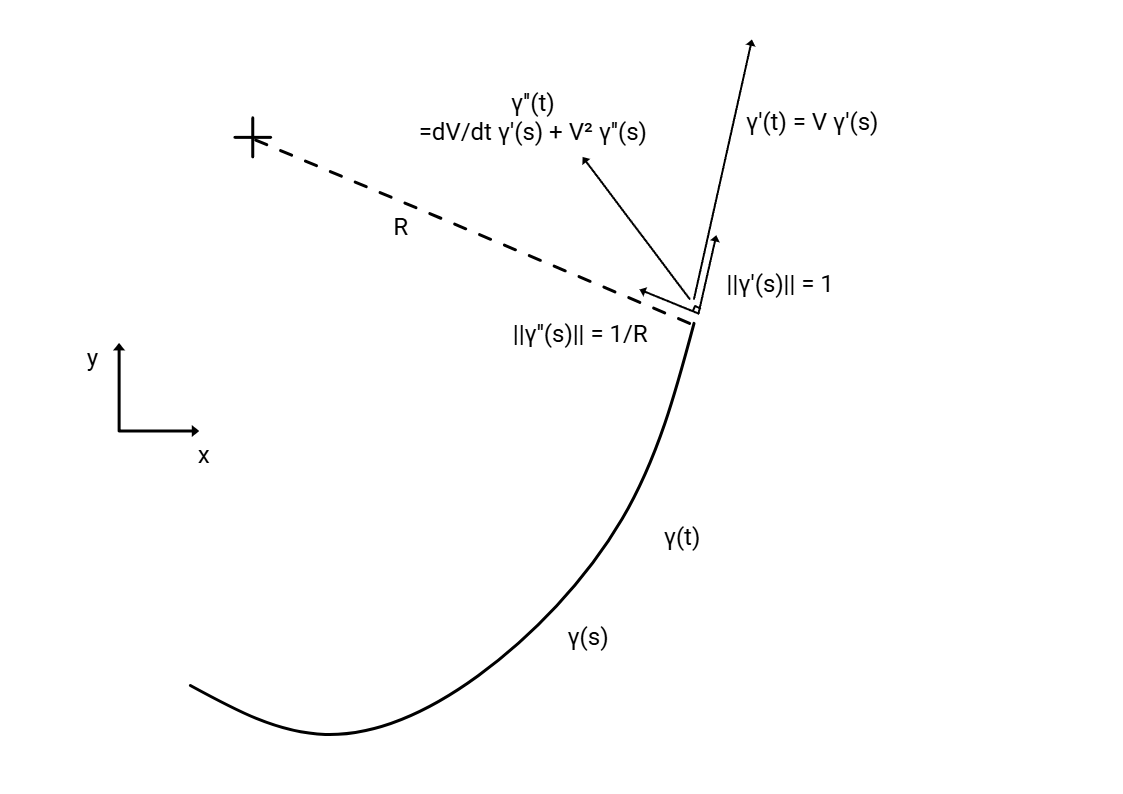

# Energy Required

The equation for the energy used by a plane flying through a path is the integral of power

$$
E = \int P(t) \  \mathrm d t = \int T(t) V(t) \  \mathrm d t
$$

We can simplify this immensely by choosing a constant velocity $V(t) = V$. 

Then $T = D$ throughout the course ($\mathrm d V / \mathrm d t = 0$), and so the energy required is

$$
E = V \int D(t) \ \mathrm d t
$$

If the plane is flying with a minor angle of attack, we have simple algebraic relations for lift and drag:

$$
\begin{align}
L &= {1 \over 2} \rho V^2 S C_L \\
D &= {1 \over 2} \rho V^2 S C_D = {1 \over 2} \rho V^2 S (C_{D, 0} + K C_L^2)
\end{align}
$$

The relation between $t$ (time) and $s$ (distance) becomes simply $V t = s$. If we know our path, we have the radius of curvature defined in terms of $R(s)$ and therefore $R(t)$. 

To keep the plane level, we have 

$$
\begin{align}
L \cos \phi &= mg \\
L \sin \phi &= mV^2 / R
\end{align}
$$

Squaring these equations and adding them together,

$$
L = \sqrt{m^2 (g^2 + V^4 / R^2)}
$$

and so

$$
C_L = {L \over {1 \over 2} \rho V^2 S} = {2 \sqrt{m^2 (g^2 + V^4 / R^2)} \over \rho V^2 S}
$$

which means 

$$
D = {1 \over 2} \rho V^2 S \left(C_{D, 0} + K 
\left({2 \sqrt{m^2 (g^2 + V^4 / R^2)} \over \rho V^2 S}\right)^2
\right)
$$

Now we can go from a numeric description of our path $\vec{\gamma}(s)$ to a description of the energy required (at constant velocity):

$$
E = V \int_0^{t_f} {1 \over 2} \rho V^2 S \left(C_{D, 0} + K 
\left({4 m^2 (g^2 + V^4 / R(t)^2) \over (\rho V^2 S)^2} \right)
\right) \ \mathrm d t
$$

recalling that $R(s) = 1/\|\gamma''(s)\|$.

## Further Simplifications

Many of the terms in the integral are constant. If we know the total distance of the path $d$, then the time $t_f$ is (for constant velocity V)

$$
t_f = {d \over V}
$$

We can then immediately pull out one of the terms:

$$
E = {1 \over 2} \rho V^2 S C_{D,0} V t_f + \text{(path-dependent terms)}= {d \over 2} \rho V^2 S C_{D,0} + \text{(path-dependent terms)}
$$

If we can break up the path into $N$ regions of constant curvature $(d_n, R_n)$ ($d_n$ is the distance along region $n$ with radius of curvature $R_n$) then the path dependent terms become

$$
\text{(path-dependent terms)} = \sum_{n=1}^N {d_n \over 2} K \frac{4 m^2 (g^2 + V^4 / R_n^2)}{\rho V^2 S}
$$

giving us a final expression of energy required as

$$
E = {d \over 2} \rho V^2 S C_{D,0} + \sum_{n=1}^N d_n  K \frac{2 m^2 (g^2 + V^4 / R_n^2)}{\rho V^2 S}
$$

recalling that

- $d$ is the total distance travelled
- $\rho$ is the air density
- $V$ is the (constant) velocity over the course (primary design variable)
- $S$ is the planform area of the wings (primary design variable)
- $C_{D, 0}$ is the zero-lift drag coefficient of the plane (secondary design variable)
- $d_n$ is the distance over the $n$th section of the course
- $R_n$ is the curvature over the $n$th section of the plane
- $K = 1 / (\pi e AR)$ is the drag polar coefficient ($C_{D, i} = K C_L^2$)
- $m$ is the mass of the plane
- $g$ is the acceleration due to gravity
- $e \in (0.9, 1)$ is the Oswald efficiency factor (secondary design variable)
- $AR = S / \bar{c}^2$ is the aspect ratio (primary design variable)
- $\bar{c}$ is the mean aerodynamic chord (primary design variable)

In [46]:
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt

rho = 1.2 # density of air, kg/m^3
g = 9.81  # acceleration due to gravity, m/s^2
m = 10    # mass of the plane, kg

def drag_polar(AR, e):
    """Coefficient of induced drag K.
    Parameters:
    AR: Aspect ratio
    e:  Oswald efficiency factor
    """
    return 1/(AR * e * np.pi)

def constant_drag(V, S, CD0):
    """Energy due to zero-lift drag coefficient
    Parameters:
    V: constant velocity
    S: reference wing area
    CD0: zero-lift drag coefficient
    """
    return 1/2 * rho * V**2 * S * CD0

def induced_drag(V, S, K, Rs):
    """Energy requirement due to lift-induced drag
    Parameters:
    V:  constant velocity
    S:  reference wing area
    K:  drag polar coefficient
    Rs: list of radii of curvature
    Returns:
    Lift of induced drag
    """
    R = np.asarray(Rs)
    induced_drag = 1/2 * K * (4 * m**2 * (g**2 + V**4 / R**2)) / (rho * V**2 * S)
    return induced_drag

def force_to_energy(f, d):
    "Turn a constant force to an energy requirement"
    return f * d

def get_CL(R, V, S):
    "Lift coefficient for a particular turning radius, velocity, and wing area"
    return 2 * np.sqrt(m**2 * (g**2 + V**4 / R**2)) / (rho * V**2 * S)

def get_phi(R,V):
    "Bank angle for a particular turning radius, velocity, and wing area"
    return np.arctan2(g, V**2/R)

def calculate_total(ds, Rs, V, S, AR, e, CD0):
    """Calculate total energy requirement
    Parameters:
    ds: list of distances
    Rs: list of radii of curvature
    V:  constant velocity
    S:  wing planform area
    AR: Aspect ratio
    e:  Oswald efficiency factor
    CD0: Zero-lift drag coefficient
    """
    d = np.sum(np.asarray(ds))
    K = drag_polar(AR, e)
    D_0 = constant_drag(V, S, CD0)
    D_i = induced_drag(V, S, K, Rs)
    energy = np.sum(force_to_energy(D_0, ds) + force_to_energy(D_i, ds))
    return energy

# Theoretical design and course
AR = 6
e = 0.95
CD0 = 0.03
ds = np.array([
    1000, 500, 1000
])
Rs = np.array([
    100, 50, 20
])


def interactive(V,S):
    print(f"Max CL: {np.max([get_CL(R, V, S) for R in Rs]):.2f}")
    print(f"Max bank angle: {np.degrees(np.max([get_phi(V, R) for R in Rs])):.2f} deg")
    print(f"Drag due to friction: {constant_energy(np.sum(np.asarray(ds)), V, S, CD0) * 1e-3:.2f} kJ")
    print(f"Drag due to lift: {induced_drag_energy(ds, Rs, V, S, drag_polar(AR, e)) * 1e-3:.2f} kJ")
    print(f"Time to complete course: {np.sum(np.asarray(ds)) / V / 60:.2f} min")
    print(f"Total energy: {calculate_total(ds, Rs, V, S, AR, e, CD0) * 1e-3:.2f} kJ")
    Rs_lin = np.linspace(np.min(Rs), np.max(Rs), 1000)
    Dis = induced_drag(V, S, drag_polar(AR, e), Rs_lin)
    D0s = constant_drag(V, S, CD0) * np.ones_like(Rs_lin)
    plt.close()
    plt.plot(Rs_lin, Dis, label="Induced drag")
    plt.plot(Rs_lin, D0s, label="Zero-lift drag")
    plt.legend()
    plt.xlabel("Radius of curvature (m)")
    plt.ylabel("D (N)")
    plt.ylim(0, np.max([np.max(Dis), np.max(D0s)]) + 1)
    plt.grid()
    return plt.show()
interact(interactive, V = widgets.FloatSlider(min=1,max=20,value=10), S=widgets.FloatSlider(min=1, max=5, value=2))

interactive(children=(FloatSlider(value=10.0, description='V', max=20.0, min=1.0), FloatSlider(value=2.0, desc…

<function __main__.interactive(V, S)>

In [24]:
def plot_interactive(S):
    plt.close()
    V = np.linspace(5, 20, 200)
    const_drag = np.zeros_like(V)
    lift_drag = np.zeros_like(V)
    tot_energy = np.zeros_like(V)
    CLs = np.zeros_like(V)
    for i, v in enumerate(V):
        const_drag[i] = constant_energy(np.sum(np.asarray(ds)), v, S, CD0)
        lift_drag[i] = induced_drag_energy(ds, Rs, v, S, drag_polar(AR, e))
        tot_energy[i] = const_drag[i] + lift_drag[i]
        CLs[i] = np.max(get_CL(np.asarray(Rs), v, S))
    plt.plot(V, const_drag, label="Constant drag")
    plt.plot(V, lift_drag, label="Drag due to lift")
    plt.plot(V, tot_energy, label="Total energy requirement")
    # ChatGPT code to fill in the allowable regions
    threshold = 1.2
    below_threshold = CLs < threshold
    
    # Identify continuous regions where C < threshold
    in_region = False
    for i in range(len(V) - 1):
        if below_threshold[i] and not in_region:
            # Start of a region where C < threshold
            start = V[i]
            in_region = True
        elif not below_threshold[i] and in_region:
            # End of the region where C < threshold
            end = V[i]
            plt.axvspan(start, end, color='green', alpha=0.3)
            in_region = False
    
    # If we ended in a region (to catch if the region goes till the end of the x data)
    if in_region:
        plt.axvspan(start, V[-1], color='green', alpha=0.3)
    plt.legend()
    plt.xlabel("V")
    plt.grid()
    plt.show()

interact(plot_interactive, S=widgets.FloatSlider(min=1,max=5))

interactive(children=(FloatSlider(value=1.0, description='S', max=5.0, min=1.0), Output()), _dom_classes=('wid…

<function __main__.plot_interactive(S)>

In [27]:
from scipy import optimize

# try to minimize total energy usage
cost = lambda x: calculate_total(ds, Rs, x[0], x[1], AR, e, CD0)
# constrained by maximum CL
constraint = {
    "type": "ineq",
    "fun": lambda x: 1.2 - np.max(get_CL(np.asarray(Rs), x[0], x[1])) # must be >= 0
}
# with appropriate bounds and x0
optimize.minimize(fun=cost, x0=[15, 2], bounds = [[5,20], [1, 5]], constraints = constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 20307.669241051113
       x: [ 6.641e+00  5.000e+00]
     nit: 12
     jac: [ 1.709e-03 -9.195e+01]
    nfev: 42
    njev: 12

TODO:

- Translate energy requirements into battery mass requirements
- Translate wing planform area into a mass requirement
- Write a cost function in the mass of the airframe / time to complete the course rather than energy required
- Write down more realistic numbers for the total course
- Add more functionality:
    - varying velocities per section (straightforward with vectorized calculations)